# 0. Se importan las librerías necesarias

In [1]:
import pandas as pd #para manipulación de datos
import numpy as np #para manipular números
import json #para trabajar con datos anidados/formato json
import seaborn as sns #para visualizaciones
import matplotlib.pyplot as plt #para visualizaciones
from wordcloud import WordCloud #para vizs de nubes de palabras

# 1. Se carga el dataset con el cual se va a trabajar

## 1.0 Carga desde Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfmovies = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset.csv') #se carga el df con ruta relativa

<ipython-input-13-5a8a23ac8bbb>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfmovies = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset.csv') #se carga el df con ruta relativa


In [ ]:
dfcredits = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/credits.csv') #se carga el df con ruta relativa

## 1.1 Carga desde directorio de trabajo

In [ ]:
dfmovies = pd.read_csv(r'Datasets/movies_dataset.csv') #se carga el df con ruta relativa

FileNotFoundError: ignored

In [ ]:
dfcredits = pd.read_csv(r'Datasets/credits.csv') #se carga el df con ruta relativa

In [ ]:
dfcredits.dtypes #se revisan los tipos de datos

In [ ]:
dfmovies.dtypes #se revisan los tipos de datos

In [ ]:
print(dfcredits.shape) #dimensiones df
dfcredits.head() #se revisan las primeras filas

In [ ]:
print(dfmovies.shape) #dimensiones df
dfmovies.head() #se revisan las primeras filas

# 2. Extracción, transformación y carga (ETL)

## Dataset Créditos

## 2.0 Registros duplicados

In [ ]:
dfcredits.duplicated().sum() #cantidad de filas duplicadas integramente

37

In [ ]:
dfcredits[dfcredits.duplicated(keep=False)].sort_values(by="id") #se revisan las filas duplicadas integramente

,cast,crew,id
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
7345,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
25895,"[{'cast_id': 11, 'character': 'Mike Gaucher / ...","[{'credit_id': '52fe44b8c3a36847f80a6389', 'de...",8767
...,...,...,...
25897,[],"[{'credit_id': '52fe4d119251416c7512ed39', 'de...",187156
25954,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189


In [ ]:
dfcredits.drop_duplicates(keep="last", inplace=True) #se eliminan las filas duplicadas

In [ ]:
dfcredits.id.duplicated().sum() #cantidad de filas con id duplicado

7

In [ ]:
dfcredits[dfcredits.id.duplicated(keep=False)].sort_values(by="id") #se revisan las filas con id duplicado

,cast,crew,id
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
9576,"[{'cast_id': 1, 'character': 'Gerard Carriere'...","[{'credit_id': '5468acec22136e68c9000d53', 'de...",69234
26638,"[{'cast_id': 1, 'character': 'Gerard Carriere'...","[{'credit_id': '52fe47bfc3a368484e0d77bf', 'de...",69234
16167,"[{'cast_id': 1004, 'character': 'Luke Oarum', ...","[{'credit_id': '52fe4a269251416c750df623', 'de...",99080
38882,"[{'cast_id': 1004, 'character': 'Luke Oarum', ...","[{'credit_id': '52fe4a269251416c750df61d', 'de...",99080
4356,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '52fe4ad6c3a36847f81e461b', 'de...",110428
23533,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '577ed5389251416976004432', 'de...",110428
838,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '52fe4b9ac3a368484e190d25', 'de...",132641
30013,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '56365ed9925141285701b06e', 'de...",132641


In [ ]:
dfcredits.drop_duplicates(subset="id", keep="last", inplace=True) #se eliminan las filas con id duplicado conservando las últimas cargadas en la base

## 2.1 Desanidado columna "crew"

In [ ]:
dfcredits['crew'].isna().sum() #se revisa si existen valores faltantes

0

In [ ]:
#si bien no existe valores faltantes, se revisan si existen valores repetidos
grupos = dfcredits.groupby(by="crew").size()
grupos[grupos > 1].sort_values(ascending=False)

crew
[]    771
dtype: int64

Al parecer que en los casos que no se cuenta con los datos, se rellena con "[]". 

In [27]:
import ast #se carga el paquete necesario

# función para extraer el nombre del director de la columna "crew"
def get_director(crew):
    crew_list = ast.literal_eval(crew)  # Convertimos el string a lista de diccionarios
    for person in crew_list:
        if person['job'] == 'Director':
            return person['name']
    return None  # en caso de no contar con el director

In [ ]:
dfcredits['director'] = dfcredits['crew'].apply(get_director)

## 2.2 Desanidado columna "cast"

In [ ]:
import ast #se carga el paquete necesario

# función para extraer el nombre del actor de la columna "cast"
def get_actor(cast):
    actor_list = []
    cast_list = ast.literal_eval(cast)  # Convertimos el string a lista de diccionarios
    for person in cast_list:
        actor_list.append(person['name'])
    return actor_list  # en caso de no contar con el actor

In [ ]:
dfcredits['actor'] = dfcredits['cast'].apply(get_actor)

## Dataset Películas

## 2.0 Registros inconsistentes y duplicados

### Duplicados

In [ ]:
dfmovies.duplicated().sum() #cantidad de filas duplicadas integramente

13

In [ ]:
dfmovies[dfmovies.duplicated(keep=False)].sort_values(by="id") #se revisan las filas duplicadas integramente

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
24844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0
14012,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0
21165,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
19890,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
21854,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,...,2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Congress,False,6.4,165.0


In [ ]:
dfmovies.drop_duplicates(keep="last", inplace=True) #se eliminan las filas duplicadas

In [ ]:
dfmovies.id.duplicated().sum() #cantidad de filas con id duplicado

17

In [ ]:
dfmovies[dfmovies.id.duplicated(keep=False)].sort_values(by="id") #se revisan las filas con id duplicado

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0
4114,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,143.0
20899,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
5710,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
4356,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
23534,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
5535,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
15765,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0
11342,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0


In [ ]:
dfmovies.drop_duplicates(subset="id", keep="last", inplace=True) #se eliminan las filas con id duplicado conservando las últimas cargadas en la base

### Inconsistencias

In [ ]:
dfmovies[pd.to_numeric(dfmovies['budget'], errors='coerce').isna()] #se buscan los registros inconsistentes en el formato de la columna

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
registros_incorrectos = dfmovies[pd.to_numeric(dfmovies['budget'], errors='coerce').isna()] #se buscan los registros inconsistentes en el formato de la columna

In [ ]:
#se reemplazan los valores incorrectos en el df
for n,i in enumerate(registros_incorrectos.index):
  print(i)
  print(n)
  fila = dfmovies.loc[i]  # guarda los datos del registro incorrecto
  fila2 = fila.tolist() #los pasa a una lista
  dfmovies.loc[i] = fila2[15:]+fila2[0:15] #reordena los datos y los asigna nuevamente en el df original

19730
0
29503
1
35587
2


In [ ]:
dfmovies.loc[19730]  # Se revisa el resultado

adult                                                                  NaN
belongs_to_collection                                                  NaN
budget                                                                 NaN
genres                                                                 NaN
homepage                                                               NaN
id                                                                     NaN
imdb_id                                                                NaN
original_language                                                      NaN
original_title                                                         NaN
overview                                                - Written by Ørnås
popularity                                                        0.065736
poster_path                               /ff9qCepilowshEtG2GYWwzt2bs4.jpg
production_companies     [{'name': 'Carousel Productions', 'id': 11176}...
production_countries     

## 2.1 Imputación de valores nulos

In [ ]:
dfmovies.isna().sum() #se revisa la cantidad de valores faltantes para cada feature

adult                        3
belongs_to_collection    40948
budget                       3
genres                       3
homepage                 37662
id                           3
imdb_id                     20
original_language           14
original_title               3
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25034
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

In [ ]:
dfmovies.dropna(axis=0, subset="id", inplace=True) #se eliminan los registros donde falta el valor de id

In [ ]:
#la variable budget no tiene NAs por lo que sólo se procede con revenue
dfmovies.revenue.fillna(value = 0, inplace=True) #se imputan los valores faltantes con 0

In [ ]:
dfmovies.dropna(axis=0, subset="release_date", inplace=True) #se eliminan los registros donde falta el valor de fecha de lanzamiento

In [ ]:
dfmovies.isna().sum() #se revisan las transformaciones

adult                        0
belongs_to_collection    40861
budget                       0
genres                       0
homepage                 37585
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24959
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

## 2.2 Cambios de formato

In [ ]:
# Se convierte la columna 'release_date' a formato de fecha y se asigna NaT a los valores no válidos
dfmovies['release_date_v2'] = pd.to_datetime(dfmovies['release_date'], format="%Y-%m-%d",errors='coerce')

# Se identifican los registros que no son fechas válidas
valores_no_validos = dfmovies[dfmovies['release_date_v2'].isna()]

In [ ]:
valores_no_validos #los registros parecen tener los datos de las columnas "release_date" e "id" intercambiados

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_date_v2


In [ ]:
# se crean dos listas con los valores correctos para reemplazar en la columna correspondiente
valores_correctos_id = valores_no_validos.release_date.tolist()
valores_correctos_date = valores_no_validos.id.tolist()

In [ ]:
#se reemplazan los valores incorrectos en el df
for n,i in enumerate(valores_no_validos.index):
  print(i)
  print(n)
  #print(dfmovies.iloc[i])
  dfmovies.loc[i, "release_date"] = valores_correctos_date[n]
  dfmovies.loc[i, "id"] = valores_correctos_id[n]

In [ ]:
# Se cambia el nombre de la columna release_date original y se crea la columna nueva con los formatos corregidos
dfmovies.drop("release_date_v2", axis=1, inplace=True)
dfmovies['release_date_orig'] = dfmovies['release_date']
dfmovies['release_date'] = pd.to_datetime(dfmovies['release_date'], format="%Y-%m-%d",errors='coerce')

In [ ]:
dfmovies.iloc[19714] # se revisa con un ejemplo el cambio de formato

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
homepage                                                               NaN
id                                                                  135647
imdb_id                                                          tt1433207
original_language                                                       en
original_title                                                 The Details
overview                 When a family of raccoons discover worms livin...
popularity                                                        5.143891
poster_path                               /c9dtcoL8UeLpJatf9nYljVPNyWH.jpg
production_companies     [{'name': 'LD Entertainment', 'id': 10285}, {'...
production_countries     

## 2.3 Desanidado

Columna "belongs_to_collection"

In [ ]:
dfmovies.head() # se revisa cuáles son las columnas con datos anidados: "belongs_to_collection", "genres", "production_companies", "production_countries" y "spoken_languages"

In [ ]:
dfmovies.belongs_to_collection.loc[2]

"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"

In [ ]:
json.loads(dfmovies.belongs_to_collection.loc[2].replace("'", '"'))

{'id': 119050,
 'name': 'Grumpy Old Men Collection',
 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg',
 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}

In [12]:
#definición de función para adecuar el formato de los datos antes de desanidarlos
def parse_collection_data(data):
    if pd.isna(data):
        return None
    else:
        try:
            return json.loads(data.replace("'", '"'))
        except:
            return None

In [ ]:
dfmovies['belongs_to_collection_v2'] = dfmovies['belongs_to_collection'].apply(parse_collection_data) #se aplica la función de formateo y se guarda en una nueva columna

In [ ]:
# Se utiliza pd.json_normalize() para desanidar los datos y crear un nuevo DataFrame
df_desanidado = pd.json_normalize(dfmovies['belongs_to_collection_v2'])

# Se agrega un sufijo a las columnas para diferenciarlas en el join
df_desanidado = df_desanidado.add_prefix('collection_')

# Combina el nuevo DataFrame desanidado con el DataFrame original utilizando el método join()
dfmovies = dfmovies.join(df_desanidado, rsuffix="collecction")


In [ ]:
dfmovies.drop(labels= ["belongs_to_collection","belongs_to_collection_v2", "collection_poster_path", "collection_backdrop_path"], axis = 1, inplace = True) #se eliminan las columnas desanidadas para evitar redundancia

In [ ]:
dfmovies.shape

(45349, 28)

Columna "genres"

In [ ]:
dfmovies['genres_v2'] = dfmovies['genres'].apply(parse_collection_data) #se aplica la función de formateo y se guarda en una nueva columna

In [ ]:
# Se utiliza pd.json_normalize() para desanidar los datos y crear un nuevo DataFrame
df_desanidado = pd.json_normalize(dfmovies['genres_v2'])

df_desanidado.head(10) #se revisa el resultado

In [ ]:
df_desanidado = df_desanidado.add_prefix('genre_') #se agrega un sufijo a cada columna

In [ ]:
cant_genres = df_desanidado.columns.tolist() #se crea la lista con los nombres de las columnas para iterar sobre ella

In [ ]:
# se itera para desanidar cada diccionario de género y unen todas las columnas
for n, i in enumerate(cant_genres):
  #print(i)
  #print(n)
  df_desanid_v2 = pd.json_normalize(df_desanidado[i]).add_prefix(f'{i}_')
  #print(df_desanid_v2.head())
  df_desanidado = df_desanidado.join(df_desanid_v2)

In [ ]:
df_desanidado.shape

(45379, 24)

In [ ]:
df_desanidado.drop(labels=cant_genres, inplace=True, axis=1) #se dropean las columnas intermedias de genero

In [ ]:
dfmovies = dfmovies.join(df_desanidado) #se guarda el nuevo df

Columna "production_companies"

In [ ]:
dfmovies['production_companies_v2'] = dfmovies['production_companies'].apply(parse_collection_data) #se aplica la función de formateo y se guarda en una nueva columna

In [ ]:
# Se utiliza pd.json_normalize() para desanidar los datos y crear un nuevo DataFrame
df_desanidado = pd.json_normalize(dfmovies['production_companies_v2'])

df_desanidado.head(10) #se revisa el resultado

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,"{'name': 'Pixar Animation Studios', 'id': 3}",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'name': 'TriStar Pictures', 'id': 559}","{'name': 'Teitler Film', 'id': 2550}","{'name': 'Interscope Communications', 'id': 10...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'name': 'Warner Bros.', 'id': 6194}","{'name': 'Lancaster Gate', 'id': 19464}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,{'name': 'Twentieth Century Fox Film Corporati...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'name': 'Sandollar Productions', 'id': 5842}","{'name': 'Touchstone Pictures', 'id': 9195}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,"{'name': 'Regency Enterprises', 'id': 508}","{'name': 'Forward Pass', 'id': 675}","{'name': 'Warner Bros.', 'id': 6194}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,"{'name': 'Paramount Pictures', 'id': 4}","{'name': 'Scott Rudin Productions', 'id': 258}","{'name': 'Mirage Enterprises', 'id': 932}","{'name': 'Sandollar Productions', 'id': 5842}","{'name': 'Constellation Entertainment', 'id': ...","{'name': 'Worldwide', 'id': 55873}","{'name': 'Mont Blanc Entertainment GmbH', 'id'...",None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,"{'name': 'Walt Disney Pictures', 'id': 2}",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,"{'name': 'Universal Pictures', 'id': 33}","{'name': 'Imperial Entertainment', 'id': 21437}","{'name': 'Signature Entertainment', 'id': 23770}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,"{'name': 'United Artists', 'id': 60}","{'name': 'Eon Productions', 'id': 7576}",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_desanidado = df_desanidado.add_prefix('production_company_') #se agrega un sufijo a cada columna

In [ ]:
cant_comp = df_desanidado.columns.tolist() #se crea la lista con los nombres de las columnas para iterar sobre ella

In [ ]:
# se itera para desanidar cada diccionario de compañías y unen todas las columnas
for n, i in enumerate(cant_comp):
  #print(i)
  #print(n)
  df_desanid_v2 = pd.json_normalize(df_desanidado[i]).add_prefix(f'{i}_')
  #print(df_desanid_v2.head())
  df_desanidado = df_desanidado.join(df_desanid_v2)

In [ ]:
df_desanidado.shape

(45379, 52)

In [ ]:
df_desanidado.drop(labels=cant_comp, inplace=True, axis=1) #se dropean las columnas intermedias de compañías

In [ ]:
dfmovies = dfmovies.join(df_desanidado) #se guarda el nuevo df

## 2.4 Creación de nuevos features/variables

Release year

In [ ]:
dfmovies['release_year'] = dfmovies['release_date'].dt.year

In [ ]:
dfmovies.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_date_orig,release_year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995-10-30,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995-12-15,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995-12-22,1995
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995-12-22,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995-02-10,1995
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,1995-12-15,1995
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,1995-12-15,1995
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,1995-12-22,1995
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,1995-12-22,1995
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1995-11-16,1995


Release month

In [ ]:
dfmovies['release_month'] = dfmovies['release_date'].dt.month

Return

In [ ]:
dfmovies['budget_v2'] = pd.to_numeric(dfmovies['budget'], errors='coerce') #se pasa a formato numérico la variable "budget", se imputa como valor faltante los datos que no pueden convertirse

In [ ]:
dfmovies[dfmovies['budget_v2'].isna()] #se revisan los registros con valores faltantes para la variable en cuestión

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,release_date_orig,release_year,release_month,budget_v2


In [ ]:
# se crea una función para lidiar con los valores faltantes y poder calcular la relación con "revenue"
def calculate_return(row):
    if row["budget_v2"] == 0 or pd.isnull(row["budget_v2"]):
        return 0
    else:
        return row["revenue"] / row["budget_v2"]

In [ ]:
dfmovies["return"] = dfmovies.apply(calculate_return, axis=1) #se guardan los resultados de la función como variable "return"

In [ ]:
dfmovies[dfmovies["budget_v2"] == 0] #se revisa el correcto funcionamiento de la función

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,release_date_orig,release_year,release_month,budget_v2,return
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995-12-22,1995,12,0,0.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995-02-10,1995,2,0,0.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,1995-12-22,1995,12,0,0.0
11,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,...,NaN,Dracula: Dead and Loving It,False,5.7,210.0,1995-12-22,1995,12,0,0.0
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,1995-12-22,1995,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,NaN,Robin Hood,False,5.7,26.0,1991-05-13,1991,5,0,0.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,NaN,Century of Birthing,False,9.0,3.0,2011-11-17,2011,11,0,0.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,A deadly game of wits.,Betrayal,False,3.8,6.0,2003-08-01,2003,8,0,0.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,NaN,Satan Triumphant,False,0.0,0.0,1917-10-21,1917,10,0,0.0


## 2.5 Eliminación columnas

In [ ]:
#se eliminan las columnas que no son necesarias para el modelo
dfmovies.drop(labels=["video","imdb_id","adult","original_title","poster_path", "homepage"], inplace=True, axis=1)

## 2.6 Unión de ambos dfs

Se procede a unir ambos datasets mediante la columna "id".

In [ ]:
dfmovies.shape

(45346, 23)

In [ ]:
dfmovies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_date_orig', 'release_year', 'release_month',
       'budget_v2', 'return'],
      dtype='object')

In [ ]:
dfcredits.shape

(45432, 4)

In [ ]:
dfcredits.columns #se verifica la presencia de la columna "id"

Index(['cast', 'crew', 'id', 'director'], dtype='object')

In [ ]:
dfmovies.info() #antes de realizar el merge se revisa el formato de la columna "id"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45346 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4485 non-null   object        
 1   budget                 45346 non-null  object        
 2   genres                 45346 non-null  object        
 3   id                     45346 non-null  object        
 4   original_language      45335 non-null  object        
 5   overview               44405 non-null  object        
 6   popularity             45346 non-null  object        
 7   production_companies   45346 non-null  object        
 8   production_countries   45346 non-null  object        
 9   release_date           45346 non-null  datetime64[ns]
 10  revenue                45346 non-null  float64       
 11  runtime                45100 non-null  object        
 12  spoken_languages       45346 non-null  object        
 13  s

In [ ]:
dfcredits.info() #antes de realizar el merge se revisa el formato de la columna "id"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      45432 non-null  object
 1   crew      45432 non-null  object
 2   id        45432 non-null  int64 
 3   director  44545 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
dfmovies['id'].isna().sum()

0

In [ ]:
dfmovies['id'] = dfmovies['id'].astype('int64')

In [ ]:
dfmoviesv2 = dfmovies.merge(right = dfcredits, on="id", how="inner")

In [ ]:
dfmoviesv2.shape

(45345, 26)

## 2.7 Creación columna para sistema recomendación 

In [5]:
# se crea un df sólo para las columnas relacionadas a la recomendación de la API
columns_recs = ['id', 'overview', 'title', 'popularity']
df_movies_recs = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_recs)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import joblib

In [6]:
#Para la siguiente función se utiliza un df filtrado según un criterio de popularidad para reducir los tiempos de procesamiento
df_sample = df_movies_recs[df_movies_recs.popularity>1.130300].copy()

# Resetear los índices
df_sample.reset_index(drop=True, inplace=True)

# Calcular tfidf_matrix
tfidf = TfidfVectorizer(stop_words='english')
df_sample['overview'].fillna('', inplace=True) #se rellenan los valores faltantes
tfidf_matrix = tfidf.fit_transform(df_sample['title']+' '+df_sample['overview']) #se seleccionan las columnas para calcular la matriz

# Calcular matriz de similaridad coseno
print("comienza el calculo de la matriz")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Extraer indices
indices = pd.Series(df_sample.index, index=df_sample['title']).drop_duplicates()

In [29]:
def get_recommendations(title:str, cosine_sim=cosine_sim):
    print(title)
    try:
        idx = indices[indices.index == title][0]
        # try:
        #   idx = indices[title][0]
        # except:
        #   idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]
        movie_indices = [i[0] for i in sim_scores]
        print(movie_indices)
        return str(df_sample['title'].iloc[movie_indices].tolist()) # se devuelve en formato str
        #return movie_indices
    except KeyError:
        print(f'No se encuentra el título {title} en el conjunto de datos')
        return []
    except IndexError:
        print(f'El índice {idx} no existe en cosine_sim')
        return []

In [45]:
# Crear una columna vacía llamada 'NuevaColumna'
df_movies_recs['recs'] = "Debido a la baja popularidad del título consultado no es posible identificar películas para recomendar."

In [ ]:
df_movies_recs.loc[df_movies_recs.popularity>1.130300,'recs'] = df_movies_recs[df_movies_recs.popularity>1.130300]['title'].apply(get_recommendations) #se agregan las recomendaciones para cada título

In [52]:
df_movies_recs.sample(10) #se revisa el resultado

,id,overview,popularity,title,recs
41140,373480,"25 years after Paris is Burning, we dive back ...",0.560965,Kiki,Debido a la baja popularidad del título consul...
42363,415358,Deepak is a lawyer suffering from bipolar diso...,2.380732,Pink,"['Roommates', 'Filth', 'The Three Faces of Eve..."
17542,51620,"In the world's most dangerous prison, a new ga...",11.086032,Death Race 2,"['Death Race: Inferno', 'In Hell', 'Death Race..."
35883,334878,He invents puzzles. He’s committed body and so...,4.848466,Blind Date,"['Blind Date', 'Small Town Murder Songs', 'A B..."
21673,55230,"Christmas Day 2004, and across the Indian Ocea...",0.089775,Tsunami: Caught on Camera,Debido a la baja popularidad del título consul...
11736,32627,A member of British Intelligence assumes a fic...,7.051042,The MacKintosh Man,"['The Ipcress File', 'Arthur Newman', 'The Exe..."
34737,300666,"After an accidental drug overdose, a talented ...",8.378022,Bravetown,"['Death Wish 4: The Crackdown', 'Clean', 'Symp..."
43086,408647,Tara Markov is a girl who has power over earth...,17.086618,Teen Titans: The Judas Contract,"['Teen Titans: Trouble in Tokyo', 'Justice Lea..."
5068,24825,"Scott James, a veteran martial arts expert, is...",8.790610,The Octagon,"['American Ninja 5', '1969', 'Five Element Nin..."
23351,158936,Filmmakers James Franco and Travis Mathews re-...,1.634311,Interior. Leather Bar.,"['Comedy Central Roast of James Franco', 'Good..."


# 3. Se guarda el df transformado

## 3.0 Guardado en Drive

In [ ]:
dfmoviesv2.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',' , index=False)

Para disminuir el tamaño de los dfs para subir a GitHub se dividen según las variables necesarias para cada función de la API

In [71]:
# Primero, se dividen las columnas del dataframe en varias listas
columns_mesydia = ['id', 'title', 'release_date']
columns_score = ['id', 'title', 'release_year', 'popularity']
columns_votos = ['id', 'title', 'release_year', 'vote_average', 'vote_count']
columns_actor = ['id', 'actor', 'return']
columns_director = ['id', 'title', 'return', 'release_year', 'budget', 'revenue', 'director']

# Luego, se crean dataframes separados para cada conjunto de columnas
df_movies_mesydia = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_mesydia, parse_dates=["release_date"])
df_movies_score = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_score)
df_movies_votos = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_votos)
df_movies_actor = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_actor)
df_movies_director = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv', sep = ',', header = 0, usecols=columns_director)
df_movies_director=df_movies_director.loc[-df_movies_director.director.isna()]

In [72]:
df_movies_mesydia.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_mesydia.csv', sep = ',' , index=False)
df_movies_score.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_score.csv', sep = ',' , index=False)
df_movies_votos.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_votos.csv', sep = ',' , index=False)
df_movies_actor.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_actor.csv', sep = ',' , index=False)
df_movies_director.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_director.csv', sep = ',' , index=False)
df_movies_recs.to_csv('/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2_recs.csv', sep = ',' , index=False)

In [3]:
dfmoviesv2 = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/movies_dataset_v2.csv') #se carga el df con ruta relativa

## 3.1 Guardado en directorio de trabajo

In [ ]:
dfmoviesv2.to_csv('Datasets/movies_dataset_v2.csv', sep = ',' , index=False)

In [ ]:
dfmoviesv2 = pd.read_csv(r'Datasets/movies_dataset_v2.csv') #se carga el df con ruta relativa

In [ ]:
dfmoviesv2.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,vote_count,release_date_orig,collection_id,collection_name,release_year,release_month,budget_v2,return,cast,crew
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,5415.0,1995-10-30,10194.0,Toy Story Collection,1995,10,30000000.0,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,2413.0,1995-12-15,NaN,NaN,1995,12,65000000.0,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,92.0,1995-12-22,119050.0,Grumpy Old Men Collection,1995,12,0.0,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,34.0,1995-12-22,NaN,NaN,1995,12,16000000.0,5.090760,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,173.0,1995-02-10,96871.0,Father of the Bride Collection,1995,2,0.0,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


# 4. Análisis Exploratorio de Datos (EDA)

In [13]:
#Se seleccionan las columnas para trabajar en el EDA teniendo en cuenta las variables más relevantes en términos de comprensión general de la base de datos y también teniendo en cuenta las funciones disponibles en la API
columns_eda = ['genres','budget_v2', 'original_language', 'overview', 'vote_average', 'vote_count','release_date', 'id', 'title', 'return', 'release_year','release_month', 'revenue', 'director', 'actor']
df_eda = dfmoviesv2[columns_eda]

In [14]:
#Cantidad de registros
df_eda.shape[0]

45345

In [15]:
#Se revisa si existe registros duplicados
df_eda.duplicated().sum()

0

In [16]:
#Se revisa los valores faltantes de cada variable
df_eda.isna().sum()

genres                 0
budget_v2              0
original_language     11
overview             941
vote_average           0
vote_count             0
release_date           0
id                     0
title                  0
return                 0
release_year           0
release_month          0
revenue                0
director             835
actor                  0
dtype: int64

La cantidad de datos faltantes resulta muy baja en relación al total de registros. De todos modos, se destacan los valores faltantes para el campo de director, lo cual sin dudas es debido a un en la carga de esos registros. Por otro lado, se observa la falta de una sinopsis (i.e. "overview) para algunas películas.

In [17]:
df_eda.describe() #resumen estadístico

,budget_v2,vote_average,vote_count,id,return,release_year,release_month,revenue
count,4.534500e+04,45345.000000,45345.000000,45345.000000,4.534500e+04,45345.000000,45345.000000,4.534500e+04
mean,4.232673e+06,5.624320,110.137766,108035.740479,6.604937e+02,1991.882280,6.459257,1.123390e+07
std,1.744391e+07,1.915178,491.904429,112180.079341,7.471882e+04,24.053016,3.628072,6.441058e+07
min,0.000000e+00,0.000000,0.000000,2.000000,0.000000e+00,1874.000000,1.000000,0.000000e+00
25%,0.000000e+00,5.000000,3.000000,26390.000000,0.000000e+00,1978.000000,3.000000,0.000000e+00
50%,0.000000e+00,6.000000,10.000000,59852.000000,0.000000e+00,2001.000000,7.000000,0.000000e+00
75%,0.000000e+00,6.800000,34.000000,156597.000000,0.000000e+00,2010.000000,10.000000,0.000000e+00
max,3.800000e+08,10.000000,14075.000000,469172.000000,1.239638e+07,2020.000000,12.000000,2.787965e+09


Algunas variables como el presupuesto ("budget_v2") y la recaudación ("revenue") presentan una gran cantidad de valores iguales a cero. Esto tiene que ver con la transformación que se realizó en la etapa de ETL para poder calcular el revenue. Se deberían entener como valores originalmente faltantes en la base de datos.

## 4.0 **Puntaje promedio y cantidad de votos**

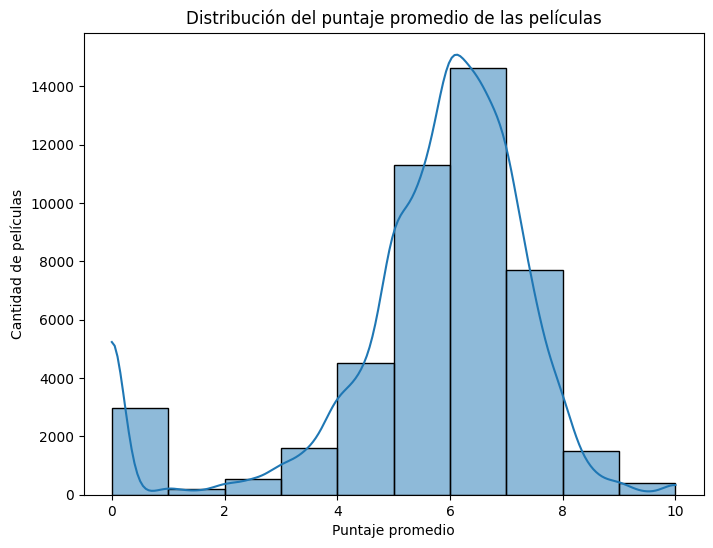

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='vote_average', bins=10, kde=True)
plt.title('Distribución del puntaje promedio de las películas')
plt.xlabel('Puntaje promedio')
plt.ylabel('Cantidad de películas')
plt.show()

Los puntajes más frecuentes se encuentran en el rango de 6 y 7 puntos, seguido por puntajes de entre 5 y 6. También se observan cerca de 3000 películas con puntajes que no superan 1.

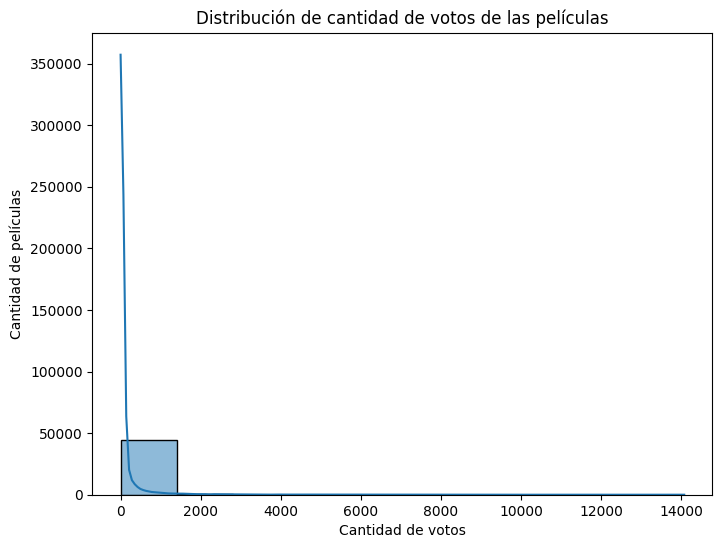

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='vote_count', bins=10, kde=True)
plt.title('Distribución de cantidad de votos de las películas')
plt.xlabel('Cantidad de votos')
plt.ylabel('Cantidad de películas')
plt.show()

Este gráfico permite identificar una enorme cantidad de películas con menos de 2000 votos. 

## 4.1 **Géneros**

In [20]:
df_eda['genres'] = df_eda['genres'].apply(parse_collection_data) #se aplica la función de formateo y se guarda en una nueva columna

<ipython-input-20-899b34aa5986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['genres'] = df_eda['genres'].apply(parse_collection_data) #se aplica la función de formateo y se guarda en una nueva columna


In [21]:
df_eda_generos = pd.json_normalize(df_eda['genres']) # Se utiliza pd.json_normalize() para desanidar los datos y crear un nuevo DataFrame
df_eda_generos.head(10) #se revisa el resultado

,0,1,2,3,4,5,6,7
0,"{'id': 16, 'name': 'Animation'}","{'id': 35, 'name': 'Comedy'}","{'id': 10751, 'name': 'Family'}",None,None,None,None,None
1,"{'id': 12, 'name': 'Adventure'}","{'id': 14, 'name': 'Fantasy'}","{'id': 10751, 'name': 'Family'}",None,None,None,None,None
2,"{'id': 10749, 'name': 'Romance'}","{'id': 35, 'name': 'Comedy'}",None,None,None,None,None,None
3,"{'id': 35, 'name': 'Comedy'}","{'id': 18, 'name': 'Drama'}","{'id': 10749, 'name': 'Romance'}",None,None,None,None,None
4,"{'id': 35, 'name': 'Comedy'}",None,None,None,None,None,None,None
5,"{'id': 28, 'name': 'Action'}","{'id': 80, 'name': 'Crime'}","{'id': 18, 'name': 'Drama'}","{'id': 53, 'name': 'Thriller'}",None,None,None,None
6,"{'id': 35, 'name': 'Comedy'}","{'id': 10749, 'name': 'Romance'}",None,None,None,None,None,None
7,"{'id': 28, 'name': 'Action'}","{'id': 12, 'name': 'Adventure'}","{'id': 18, 'name': 'Drama'}","{'id': 10751, 'name': 'Family'}",None,None,None,None
8,"{'id': 28, 'name': 'Action'}","{'id': 12, 'name': 'Adventure'}","{'id': 53, 'name': 'Thriller'}",None,None,None,None,None
9,"{'id': 12, 'name': 'Adventure'}","{'id': 28, 'name': 'Action'}","{'id': 53, 'name': 'Thriller'}",None,None,None,None,None


In [22]:
df_eda_generos = df_eda_generos.add_prefix('genre_') #se agrega un sufijo a cada columna
cant_genres = df_eda_generos.columns.tolist() #se crea la lista con los nombres de las columnas para iterar sobre ella
# se itera para desanidar cada diccionario de género y unen todas las columnas
for n, i in enumerate(cant_genres):
  ddf_eda_generos_v2 = pd.json_normalize(df_eda_generos[i]).add_prefix(f'{i}_')
  df_eda_generos = df_eda_generos.join(ddf_eda_generos_v2)

df_eda_generos = df_eda_generos.filter(like='_name', axis=1) #se conservan sólo las columnas con los nombres de cada género

In [23]:
df_melted = df_eda_generos.melt(var_name='column', value_name='genre') # se usa melt para "unpivotear" el df
genre_counts = df_melted['genre'].value_counts() # se cuenta la cantidad de veces que aparece cada género
genre_counts

Drama              20234
Comedy             13175
Thriller            7614
Romance             6728
Action              6588
Horror              4668
Crime               4302
Documentary         3919
Adventure           3488
Science Fiction     3037
Family              2765
Mystery             2461
Fantasy             2309
Animation           1928
Foreign             1618
Music               1597
History             1397
War                 1322
Western             1042
TV Movie             765
Name: genre, dtype: int64

Los géneros más frecuentes son drama, comedia, *thriller*, romántica y acción; siendo las películas dramáticas notablemente más abundantes que el resto. Esto se puede observar mejor en el siguiente gráfico de torta.

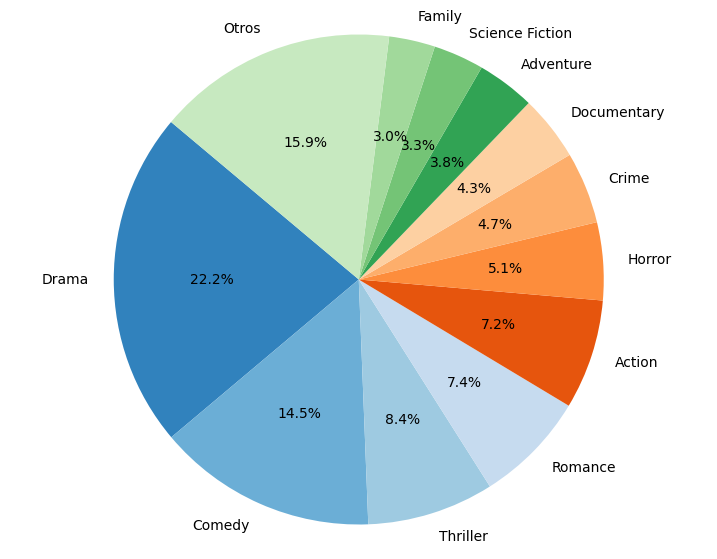

In [24]:
# se calcula la frecuencia relativa porcentual de cada género
genre_percents = genre_counts / genre_counts.sum() * 100

genre_counts_grouped = genre_counts.copy() # se crea una nueva Serie donde los géneros con un porcentaje menor al 3% se agrupan como 'Otros'
genre_counts_grouped[genre_percents < 3] = -1  # se asigna un valor temporal a los géneros con un porcentaje menor al 3%
genre_counts_grouped = genre_counts_grouped[genre_counts_grouped != -1]  # se eliminan esos géneros
genre_counts_grouped['Otros'] = genre_counts[genre_percents < 3].sum()  # se añade una nueva categoría 'Otros'

# se crea el gráfico de torta
labels = genre_counts_grouped.index
sizes = genre_counts_grouped.values
colors = plt.cm.tab20c.colors

plt.figure(figsize=(9,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

## 4.2 **Sinopsis y títulos**

Se analiza la frecuencia de palabras tanto en las sinopsis de cada película como en sus títulos utilizando la librería *worldcloud* para generar las nubes de palabras cuyos tamaños dependerán de su abundancia respectiva.

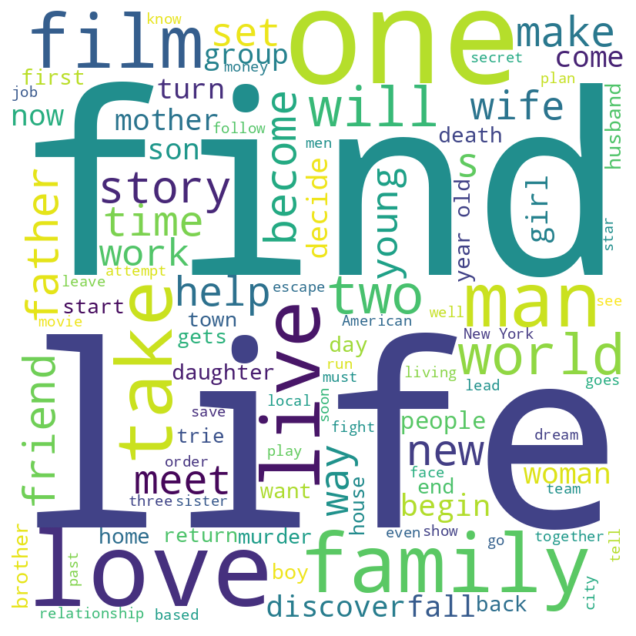

In [25]:
# se concatenan todas las sinopsis en una única cadena de texto
text = ' '.join(df_eda['overview'].dropna())

# se crea la nube de palabras
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=100).generate(text)

# se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

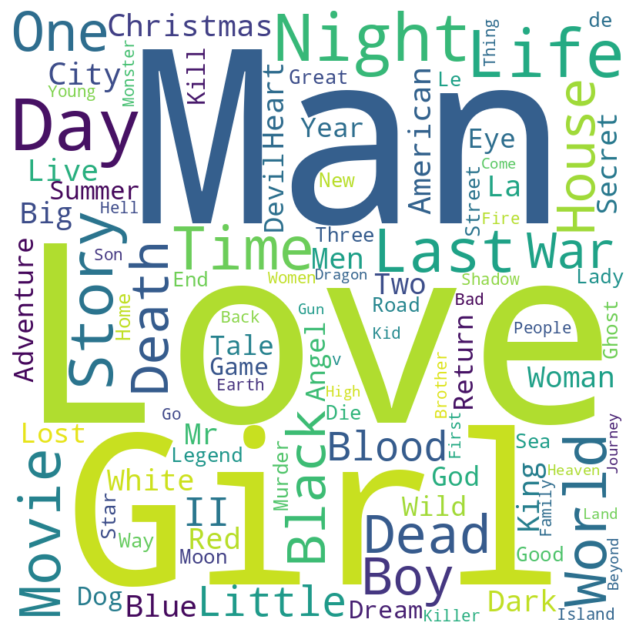

In [26]:
# se concatenan todas las sinopsis en una única cadena de texto
text = ' '.join(df_eda['title'].dropna())

# se crea la nube de palabras
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=100).generate(text)

# se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.3 **Recaudación, presupuesto y retorno de inversión**

Se analiza la relación entre las 3 variables relacionadas más puramente con el negocio y la inversión de cada película.

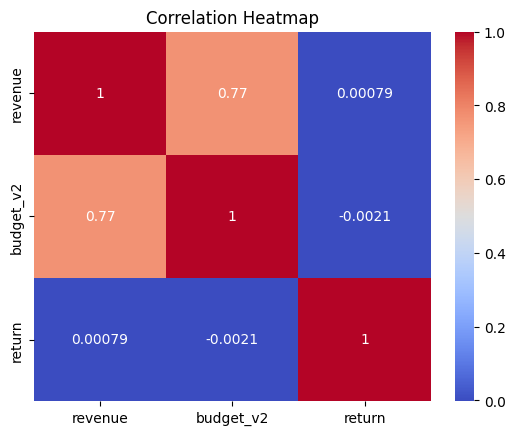

In [30]:
correlation_matrix = df_eda[['revenue', 'budget_v2', 'return']].corr() #se calcula la correlación entre las 3 variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #se crea la visualización
plt.title('Mapa de calor de correlación')
plt.show()

Se observa una correlación positiva elevada entre el presupuesto y la recaudación. Si bien no es posible afirmar causalidad entre ambas variables, podemos afirmar que para estos datos un mayor presupuesto está asociado con una mayor recaudación.

## 4.4 **Fechas de estreno**

Se analizó la distribución de las películas según el año de estreno. Resultando el año 2014 como el año con mayor cantidad de lanzamientos. Posteriormente a ese año, los estrenos fueron disminuyendo año tras año, en contraste con la tendencia creciente de estrenos de los años anteriores.

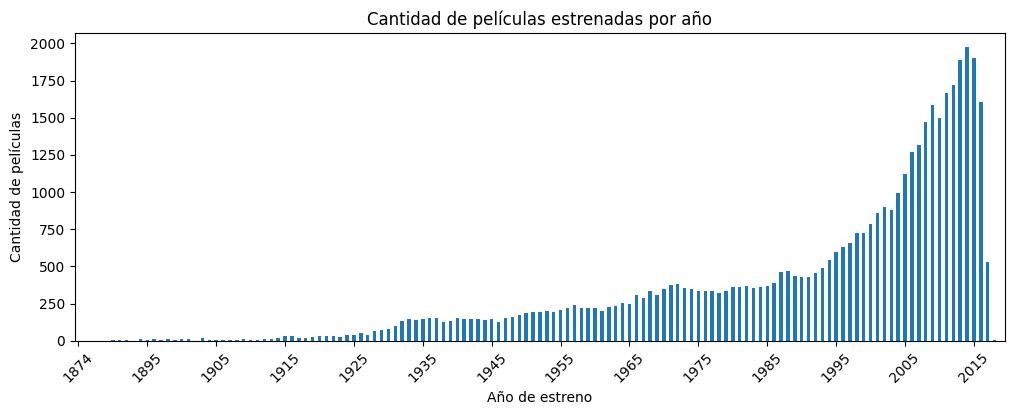

In [52]:
plt.figure(figsize=(12, 4))
df_eda['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de películas estrenadas por año')
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad de películas')

# se colocan etiquetas en el eje x cada 10 años
plt.xticks(np.arange(0, len(df_eda['release_year'].unique()), 10), rotation=45)

plt.show()


## 4.5 **Directores**

Inicialmente se analizan los directores con mayor retorno de inversión promedio.






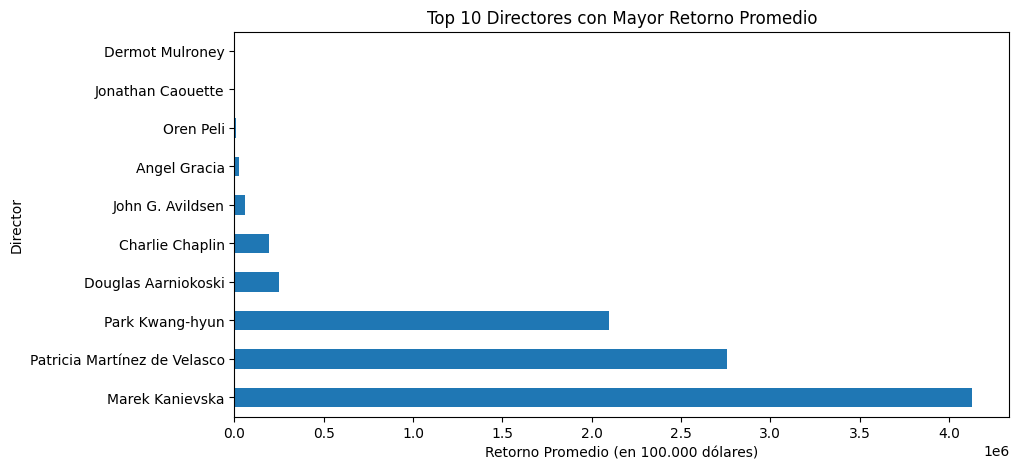

In [62]:
# se agrupa el dataframe por director y se calcula la media del retorno
df_director_return = df_eda.groupby('director')['return'].mean().sort_values(ascending=False)

# se toman los 10 directores con mayor retorno promedio para una visualización más clara
top_directors = df_director_return.head(10)

# se crea el gráfico de barras
plt.figure(figsize=(10, 5))
top_directors.plot(kind='barh')
plt.title('Top 10 Directores con Mayor Retorno Promedio')
plt.xlabel('Retorno Promedio (en 100.000 dólares)')
plt.ylabel('Director')
plt.show()


Cabe aclarar que no necesariamente son los directores más taquilleros ni más prolíficos. Un director que haya dirigido una sola película con un alto retorno aparecería sobre uno que ha dirigido muchas películas con un buen retorno promedio. También es cierto que los datos de return tienen una gran presencia de valores faltantes, por lo que el promedio no resultó una métrica del todo adecuada.

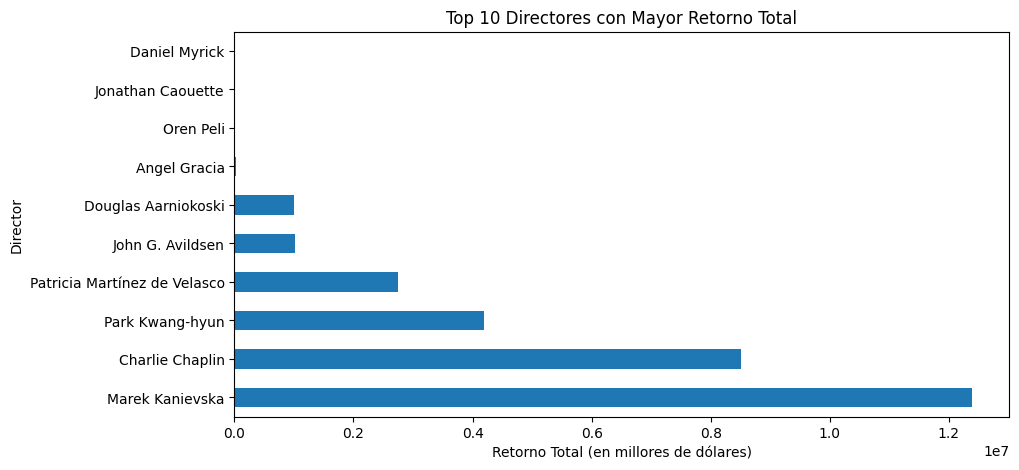

In [63]:
# se agrupa el dataframe por director y calcula la suma de retorno
df_director_total_return = df_eda.groupby('director')['return'].sum().sort_values(ascending=False)

# se toman los 10 directores con el mayor retorno total
top_total_return_directors = df_director_total_return.head(10)

# se crea el gráfico de barras
plt.figure(figsize=(10, 5))
top_total_return_directors.plot(kind='barh')
plt.title('Top 10 Directores con Mayor Retorno Total')
plt.xlabel('Retorno Total (en millores de dólares)')
plt.ylabel('Director')
plt.show()


Los directores con mayor retorno total coinciden casi todos con los directores del top 10 anterior. Sin embargo, a analizar los directores con mayor cantidad de películas dirigidas, los resultados son muy diferentes.

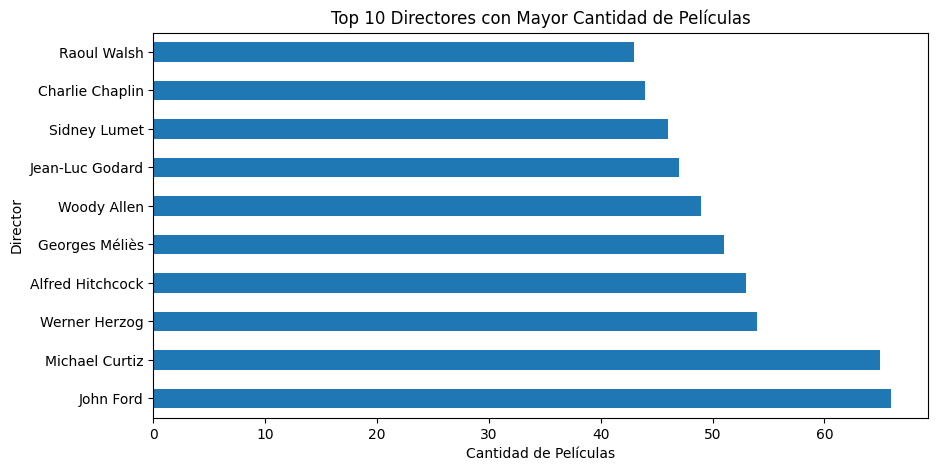

In [60]:
# se agrupa el dataframe por director y se cuenta el número de películas
df_director_movies_count = df_eda['director'].value_counts().sort_values(ascending=False)

# se toman los 10 directores con la mayor cantidad de películas
top_movie_directors = df_director_movies_count.head(10)

# se crea el gráfico de barras
plt.figure(figsize=(10, 5))
top_movie_directors.plot(kind='barh')
plt.title('Top 10 Directores con Mayor Cantidad de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Director')
plt.show()